In [40]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509'    
}
session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video',

 


In [41]:
type(data)

dict

In [43]:
import pandas as pd

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [44]:
#This normalizes the data and makes it all pretty in a dataframe

pd.json_normalize(data['data'])

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,10105,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19328931.00000,19328931.00000,NaN,1,NaN,NaN,None,2023-03-26T19:03:00.000Z,27831.73794,14033784937.06223,-4.00620,-0.03597,1.79320,-1.85956,20.37326,22.54510,65.37482,537957742210.85620,46.32530,584466496694.93005,None,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,6627,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-03-26T19:03:00.000Z,1767.08201,7257711005.10406,4.61340,-0.01929,2.16361,-3.38763,10.71182,13.64539,45.51091,216244657958.40814,18.61980,216244657958.41000,None,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,50172,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,79022291662.57704,83091735571.98807,NaN,3,NaN,NaN,None,2023-03-26T19:03:00.000Z,1.00080,22446938377.14137,-5.57460,0.00547,-0.01041,-0.18842,0.07066,0.06842,0.08557,79085759970.21188,6.80950,83158472333.53000,None,2023-03-26T19:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,1228,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157889566.64141,159979963.59043,NaN,4,NaN,NaN,None,2023-03-26T19:03:00.000Z,327.70561,369209874.31496,-12.65810,-0.00464,2.03422,-3.73677,8.81502,8.64945,35.18865,51741295980.05345,4.45500,52426330777.20000,None,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN
4,3408,USD Coin,USDC,usd-coin,11160,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33892162246.88731,33892162246.88731,NaN,5,NaN,NaN,None,2023-03-26T19:03:00.000Z,0.99997,3514922673.85971,-7.92590,0.00408,0.00766,0.01732,0.00483,-0.01757,-0.00538,33891021449.55895,2.91830,33891021449.56000,None,2023-03-26T19:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
5,52,XRP,XRP,xrp,908,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,None,2023-03-26T19:03:00.000Z,0.44673,1253790766.81976,-27.33600,-0.38394,-2.61259,13.05878,18.70425,9.46777,22.49939,22761535866.14973,1.95980,44673460294.88000,None,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN
6,2010,Cardano,ADA,cardano,742,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34731017778.38400,35608886723.95100,NaN,7,NaN,NaN,None,2023-03-26T19:03:00.000Z,0.35599,227300744.99059,4.44480,0.17342,0.92812,1.38385,-2.59433,-0.79561,36.00090,12363952252.82539,1.06460,16019624156.35000,None,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN
7,3890,Polygon,MATIC,polygon,630,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",10000000000.00000,9080469069.28493,10000000000.00000,NaN,8,NaN,NaN,None,2023-03-26T19:03:00.000Z,1.09546,303776439.73349,-9.08600,-0.11883,1.09360,-9.29771,-14.14025,13.60418,36.56394,9947316759.80321,0.85650,10954628757.51000,None,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN
8,74,Dogecoin,DOGE,dogecoin,665,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,132670764299.89409,132670764299.89409,NaN,9,NaN,NaN,None,2023-03-26T19:03:00.000Z,0.07444,253758021.81149,-12.61550,-0.1

In [45]:
#This normalizes the data and makes it all pretty in a dataframe and adding timestamp at the end of the data

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10105,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19328931.00000,19328931.00000,NaN,1,NaN,NaN,None,2023-03-26T19:03:00.000Z,27831.73794,14033784937.06223,-4.00620,-0.03597,1.79320,-1.85956,20.37326,22.54510,65.37482,537957742210.85620,46.32530,584466496694.93005,None,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-26 19:05:04.018072
1,1027,Ethereum,ETH,ethereum,6627,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-03-26T19:03:00.000Z,1767.08201,7257711005.10406,4.61340,-0.01929,2.16361,-3.38763,10.71182,13.64539,45.51091,216244657958.40814,18.61980,216244657958.41000,None,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-26 19:05:04.018072
2,825,Tether,USDT,tether,50172,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,79022291662.57704,83091735571.98807,NaN,3,NaN,NaN,None,2023-03-26T19:03:00.000Z,1.00080,22446938377.14137,-5.57460,0.00547,-0.01041,-0.18842,0.07066,0.06842,0.08557,79085759970.21188,6.80950,83158472333.53000,None,2023-03-26T19:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-26 19:05:04.018072
3,1839,BNB,BNB,bnb,1228,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157889566.64141,159979963.59043,NaN,4,NaN,NaN,None,2023-03-26T19:03:00.000Z,327.70561,369209874.31496,-12.65810,-0.00464,2.03422,-3.73677,8.81502,8.64945,35.18865,51741295980.05345,4.45500,52426330777.20000,None,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-26 19:05:04.018072
4,3408,USD Coin,USDC,usd-coin,11160,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33892162246.88731,33892162246.88731,NaN,5,NaN,NaN,None,2023-03-26T19:03:00.000Z,0.99997,3514922673.85971,-7.92590,0.00408,0.00766,0.01732,0.00483,-0.01757,-0.00538,33891021449.55895,2.91830,33891021449.56000,None,2023-03-26T19:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-26 19:05:04.018072
5,52,XRP,XRP,xrp,908,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,None,2023-03-26T19:03:00.000Z,0.44673,1253790766.81976,-27.33600,-0.38394,-2.61259,13.05878,18.70425,9.46777,22.49939,22761535866.14973,1.95980,44673460294.88000,None,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-26 19:05:04.018072
6,2010,Cardano,ADA,cardano,742,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34731017778.38400,35608886723.95100,NaN,7,NaN,NaN,None,2023-03-26T19:03:00.000Z,0.35599,227300744.99059,4.44480,0.17342,0.92812,1.38385,-2.59433,-0.79561,36.00090,12363952252.82539,1.06460,16019624156.35000,None,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-26 19:05:04.018072
7,3890,Polygon,MATIC,polygon,630,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",10000000000.00000,9080469069.28493,10000000000.00000,NaN,8,NaN,NaN,None,2023-03-26T19:03:00.000Z,1.09546,303776439.73349,-9.08600,-0.11883,1.09360,-9.29771,-14.14025,13.60418,36.56394,9947316759.80321,0.85650,10954628757.51000,None,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-26 19:05:04.018072
8,74,Do

In [46]:
# defining function


def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
   
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

#AUTOMATIC PULL TO CSV
    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    if not os.path.isfile(r'C:\Users\kadar\OneDrive\Documents\Python Scripts\API2.csv'):
        df.to_csv(r'C:\Users\kadar\OneDrive\Documents\Python Scripts\API2.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\kadar\OneDrive\Documents\Python Scripts\API2.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [47]:
#Creating Script to run automatically

import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [50]:
df72 = pd.read_csv(r'C:\Users\kadar\OneDrive\Documents\Python Scripts\API2.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10105,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19328931.00000,19328931.00000,NaN,1,NaN,NaN,NaN,2023-03-26T19:03:00.000Z,27831.73794,14033784937.00000,-4.00620,-0.03597,1.79320,-1.85956,20.37326,22.54510,65.37482,537958000000.00000,46.32530,584466000000.00000,NaN,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,05:04.0,NaN
1,1,1027,Ethereum,ETH,ethereum,6627,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.20000,122373866.20000,NaN,2,NaN,NaN,NaN,2023-03-26T19:03:00.000Z,1767.08201,7257711005.00000,4.61340,-0.01929,2.16361,-3.38763,10.71182,13.64539,45.51091,216245000000.00000,18.61980,216245000000.00000,NaN,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,05:04.0,NaN
2,2,825,Tether,USDT,tether,50172,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,79022291663.00000,83091735572.00000,NaN,3,NaN,NaN,NaN,2023-03-26T19:03:00.000Z,1.00080,22446938377.00000,-5.57460,0.00547,-0.01041,-0.18842,0.07066,0.06842,0.08557,79085759970.00000,6.80950,83158472334.00000,NaN,2023-03-26T19:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,05:04.0,NaN
3,3,1839,BNB,BNB,bnb,1228,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,157889566.60000,159979963.60000,NaN,4,NaN,NaN,NaN,2023-03-26T19:03:00.000Z,327.70561,369209874.30000,-12.65810,-0.00464,2.03422,-3.73677,8.81502,8.64945,35.18865,51741295980.00000,4.45500,52426330777.00000,NaN,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,05:04.0,NaN
4,4,3408,USD Coin,USDC,usd-coin,11160,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,33892162247.00000,33892162247.00000,NaN,5,NaN,NaN,NaN,2023-03-26T19:03:00.000Z,0.99997,3514922674.00000,-7.92590,0.00408,0.00766,0.01732,0.00483,-0.01757,-0.00538,33891021450.00000,2.91830,33891021450.00000,NaN,2023-03-26T19:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,05:04.0,NaN
5,5,52,XRP,XRP,xrp,908,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,NaN,2023-03-26T19:03:00.000Z,0.44673,1253790767.00000,-27.33600,-0.38394,-2.61259,13.05878,18.70425,9.46777,22.49939,22761535866.00000,1.95980,44673460295.00000,NaN,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,05:04.0,NaN
6,6,2010,Cardano,ADA,cardano,742,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34731017778.00000,35608886724.00000,NaN,7,NaN,NaN,NaN,2023-03-26T19:03:00.000Z,0.35599,227300745.00000,4.44480,0.17342,0.92812,1.38385,-2.59433,-0.79561,36.00090,12363952253.00000,1.06460,16019624156.00000,NaN,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,05:04.0,NaN
7,7,3890,Polygon,MATIC,polygon,630,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'zero-kno...",10000000000.00000,9080469069.00000,10000000000.00000,NaN,8,NaN,NaN,NaN,2023-03-26T19:03:00.000Z,1.09546,303776439.70000,-9.08600,-0.11883,1.09360,-9.29771,-14.14025,13.60418,36.56394,9947316760.00000,0.85650,10954628758.00000,NaN,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,05:04.0,NaN
8,8,74,Dogecoin,DOGE,dogecoin,665,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha

In [51]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10105,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19328931.00000,19328931.00000,NaN,1,NaN,NaN,None,2023-03-26T19:03:00.000Z,27831.73794,14033784937.06223,-4.00620,-0.03597,1.79320,-1.85956,20.37326,22.54510,65.37482,537957742210.85620,46.32530,584466496694.93005,None,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-26 19:05:04.018072,NaT
1,1027,Ethereum,ETH,ethereum,6627,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-03-26T19:03:00.000Z,1767.08201,7257711005.10406,4.61340,-0.01929,2.16361,-3.38763,10.71182,13.64539,45.51091,216244657958.40814,18.61980,216244657958.41000,None,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-26 19:05:04.018072,NaT
2,825,Tether,USDT,tether,50172,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,79022291662.57704,83091735571.98807,NaN,3,NaN,NaN,None,2023-03-26T19:03:00.000Z,1.00080,22446938377.14137,-5.57460,0.00547,-0.01041,-0.18842,0.07066,0.06842,0.08557,79085759970.21188,6.80950,83158472333.53000,None,2023-03-26T19:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-26 19:05:04.018072,NaT
3,1839,BNB,BNB,bnb,1228,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157889566.64141,159979963.59043,NaN,4,NaN,NaN,None,2023-03-26T19:03:00.000Z,327.70561,369209874.31496,-12.65810,-0.00464,2.03422,-3.73677,8.81502,8.64945,35.18865,51741295980.05345,4.45500,52426330777.20000,None,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-26 19:05:04.018072,NaT
4,3408,USD Coin,USDC,usd-coin,11160,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33892162246.88731,33892162246.88731,NaN,5,NaN,NaN,None,2023-03-26T19:03:00.000Z,0.99997,3514922673.85971,-7.92590,0.00408,0.00766,0.01732,0.00483,-0.01757,-0.00538,33891021449.55895,2.91830,33891021449.56000,None,2023-03-26T19:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-26 19:05:04.018072,NaT
5,52,XRP,XRP,xrp,908,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,None,2023-03-26T19:03:00.000Z,0.44673,1253790766.81976,-27.33600,-0.38394,-2.61259,13.05878,18.70425,9.46777,22.49939,22761535866.14973,1.95980,44673460294.88000,None,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-26 19:05:04.018072,NaT
6,2010,Cardano,ADA,cardano,742,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34731017778.38400,35608886723.95100,NaN,7,NaN,NaN,None,2023-03-26T19:03:00.000Z,0.35599,227300744.99059,4.44480,0.17342,0.92812,1.38385,-2.59433,-0.79561,36.00090,12363952252.82539,1.06460,16019624156.35000,None,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-26 19:05:04.018072,NaT
7,3890,Polygon,MATIC,polygon,630,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",10000000000.00000,9080469069.28493,10000000000.00000,NaN,8,NaN,NaN,None,2023-03-26T19:03:00.000Z,1.09546,303776439.73349,-9.08600,-0.11883,1.09360,-9.29771,-14.14025,13.60418,36.56394,9947316759.80321,0.85650,10954628757.51000,None,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,

# TRANSFORMING THE DATA

In [52]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [53]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10105,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19328931.00000,19328931.00000,NaN,1,NaN,NaN,None,2023-03-26T19:03:00.000Z,27831.73794,14033784937.06223,-4.00620,-0.03597,1.79320,-1.85956,20.37326,22.54510,65.37482,537957742210.85620,46.32530,584466496694.93005,None,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-26 19:05:04.018072,NaT
1,1027,Ethereum,ETH,ethereum,6627,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-03-26T19:03:00.000Z,1767.08201,7257711005.10406,4.61340,-0.01929,2.16361,-3.38763,10.71182,13.64539,45.51091,216244657958.40814,18.61980,216244657958.41000,None,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-26 19:05:04.018072,NaT
2,825,Tether,USDT,tether,50172,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,79022291662.57704,83091735571.98807,NaN,3,NaN,NaN,None,2023-03-26T19:03:00.000Z,1.00080,22446938377.14137,-5.57460,0.00547,-0.01041,-0.18842,0.07066,0.06842,0.08557,79085759970.21188,6.80950,83158472333.53000,None,2023-03-26T19:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-26 19:05:04.018072,NaT
3,1839,BNB,BNB,bnb,1228,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157889566.64141,159979963.59043,NaN,4,NaN,NaN,None,2023-03-26T19:03:00.000Z,327.70561,369209874.31496,-12.65810,-0.00464,2.03422,-3.73677,8.81502,8.64945,35.18865,51741295980.05345,4.45500,52426330777.20000,None,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-26 19:05:04.018072,NaT
4,3408,USD Coin,USDC,usd-coin,11160,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33892162246.88731,33892162246.88731,NaN,5,NaN,NaN,None,2023-03-26T19:03:00.000Z,0.99997,3514922673.85971,-7.92590,0.00408,0.00766,0.01732,0.00483,-0.01757,-0.00538,33891021449.55895,2.91830,33891021449.56000,None,2023-03-26T19:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-26 19:05:04.018072,NaT
5,52,XRP,XRP,xrp,908,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,None,2023-03-26T19:03:00.000Z,0.44673,1253790766.81976,-27.33600,-0.38394,-2.61259,13.05878,18.70425,9.46777,22.49939,22761535866.14973,1.95980,44673460294.88000,None,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-26 19:05:04.018072,NaT
6,2010,Cardano,ADA,cardano,742,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34731017778.38400,35608886723.95100,NaN,7,NaN,NaN,None,2023-03-26T19:03:00.000Z,0.35599,227300744.99059,4.44480,0.17342,0.92812,1.38385,-2.59433,-0.79561,36.00090,12363952252.82539,1.06460,16019624156.35000,None,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-26 19:05:04.018072,NaT
7,3890,Polygon,MATIC,polygon,630,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",10000000000.00000,9080469069.28493,10000000000.00000,NaN,8,NaN,NaN,None,2023-03-26T19:03:00.000Z,1.09546,303776439.73349,-9.08600,-0.11883,1.09360,-9.29771,-14.14025,13.60418,36.56394,9947316759.80321,0.85650,10954628757.51000,None,2023-03-26T19:03:00.000Z,NaN,NaN,NaN,NaN,

In [54]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.06918,1.76714,-1.86240,20.35831,22.53616,65.33334
Ethereum,-0.06554,2.16270,-3.40660,10.64795,13.61185,45.45521
Tether,-0.00175,-0.00022,-0.20200,0.07207,0.06873,0.08771
BNB,-0.02330,2.19243,-3.77999,8.75966,8.65008,35.18303
USD Coin,-0.00569,0.01732,-0.00135,-0.00464,-0.01976,-0.00653
XRP,-0.34968,-2.36580,13.05105,18.65587,9.47467,22.51034
Cardano,0.23305,1.19093,1.38713,-2.55312,-0.74589,35.98951
Polygon,-0.13342,1.20811,-9.32206,-14.17906,13.62385,36.54015
Dogecoin,-0.12634,0.74597,-2.55892,-7.79223,-12.06979,-1.50434


In [55]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.06918
             quote.USD.percent_change_24h     1.76714
             quote.USD.percent_change_7d     -1.86240
             quote.USD.percent_change_30d    20.35831
             quote.USD.percent_change_60d    22.53616
             quote.USD.percent_change_90d    65.33334
Ethereum     quote.USD.percent_change_1h     -0.06554
             quote.USD.percent_change_24h     2.16270
             quote.USD.percent_change_7d     -3.40660
             quote.USD.percent_change_30d    10.64795
             quote.USD.percent_change_60d    13.61185
             quote.USD.percent_change_90d    45.45521
Tether       quote.USD.percent_change_1h     -0.00175
             quote.USD.percent_change_24h    -0.00022
             quote.USD.percent_change_7d     -0.20200
             quote.USD.percent_change_30d     0.07207
             quote.USD.percent_change_60d     0.06873
             quote.USD.percent_change_90

In [56]:
type(df4)

pandas.core.series.Series

In [57]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.06918
            quote.USD.percent_change_24h   1.76714
            quote.USD.percent_change_7d   -1.86240
            quote.USD.percent_change_30d  20.35831
            quote.USD.percent_change_60d  22.53616
            quote.USD.percent_change_90d  65.33334
Ethereum    quote.USD.percent_change_1h   -0.06554
            quote.USD.percent_change_24h   2.16270
            quote.USD.percent_change_7d   -3.40660
            quote.USD.percent_change_30d  10.64795
            quote.USD.percent_change_60d  13.61185
            quote.USD.percent_change_90d  45.45521
Tether      quote.USD.percent_change_1h   -0.00175
            quote.USD.percent_change_24h  -0.00022
            quote.USD.percent_change_7d   -0.20200
            quote.USD.percent_change_30d   0.07207
            quote.USD.percent_change_60d   0.06873
            quote.USD.percent_change_90d   0.08771
BNB         quote.USD.percent_change_1h   -0.02330
            quote.USD.percent_change_24h   2.19243
            quote.USD.percent_change_7d   -3.77999
            quote.USD.percent_change_30d   8.75966
            quote.USD.percent_change_60d   8.65008
            quote.USD.percent_change_90d  35.18303
USD Coin    quote.USD.percent_change_1h   -0.00569
            quote.USD.percent_change_24h   0.01732
            quote.USD.percent_change_7d   -0.00135
            quote.USD.percent_change_30d  -0.00464
            quote.USD.percent_change_60d  -0.01976
            quote.USD.percent_change_90d  -0.00653
XRP         quote.USD.percent_change_1h   -0.34968
            quote.USD.percent_change_24h  -2.36580
            quote.USD.percent_change_7d   13.05105
            quote.USD.percent_change_30d  18.65587
            quote.USD.percent_change_60d   9.47467
            quote.USD.percent_change_90d  22.51034
Cardano     quote.USD.percent_change_1h    0.23305
            quote.USD.percent_change_24h   1.19093
            quote.USD.percent_change_7d    1.38713
            quote.USD.percent_change_30d  -2.55312
            quote.USD.percent_change_60d  -0.74589
            quote.USD.percent_change_90d  35.98951
Polygon     quote.USD.percent_change_1h   -0.13342
            quote.USD.percent_change_24h   1.20811
            quote.USD.percent_change_7d   -9.32206
            quote.USD.percent_change_30d -14.17906
            quote.USD.percent_change_60d  13.62385
            quote.USD.percent_change_90d  36.54015
Dogecoin    quote.USD.percent_change_1h   -0.12634
            quote.USD.percent_change_24h   0.74597
            quote.USD.percent_change_7d   -2.55892
            quote.USD.percent_change_30d  -7.79223
            quote.USD.percent_change_60d -12.06979
            quote.USD.percent_change_90d  -1.50434
Solana      quote.USD.percent_change_1h    0.32476
            quote.USD.percent_change_24h   2.59465
            quote.USD.percent_change_7d   -6.32237
            quote.USD.percent_change_30d  -8.74701
            quote.USD.percent_change_60d -11.57388
            quote.USD.percent_change_90d  87.55601
Binance USD quote.USD.percent_change_1h    0.01207
            quote.USD.percent_change_24h   0.01278
            quote.USD.percent_change_7d   -0.07789
            quote.USD.percent_change_30d  -0.04170
            quote.USD.percent_change_60d  -0.04081
            quote.USD.percent_change_90d  -0.02881
Polkadot    quote.USD.percent_change_1h   -0.08555
            quote.USD.percent_change_24h   1.76852
            quote.USD.percent_change_7d   -8.60405
            quote.USD.percent_change_30d  -9.10665
            quote.USD.percent_change_60d  -2.98517
            quote.USD.percent_change_90d  33.11003
Litecoin    quote.USD.percent_change_1h    0.21722
            quote.USD.percent_change_24h   2.57964
            quote.USD.percent_change_7d    8.58276
            quote.USD.percent_change_30d   2.04372
            quote.USD.percent_change_60d   6.03025
            quo

# Visualizing The Data

In [58]:
df5.count()

values    90
dtype: int64

In [59]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"


,values
0,-0.06918
1,1.76714
2,-1.86240
3,20.35831
4,22.53616
5,65.33334
6,-0.06554
7,2.16270
8,-3.40660
9,10.64795


In [64]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,values
0,-0.06918
1,1.76714
2,-1.86240
3,20.35831
4,22.53616
5,65.33334
6,-0.06554
7,2.16270
8,-3.40660
9,10.64795


In [ ]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [67]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,27831.73794,2023-03-26 19:05:04.018072
0,Bitcoin,27826.03426,NaT
0,Bitcoin,27817.06943,NaT


ValueError: cannot reindex from a duplicate axis

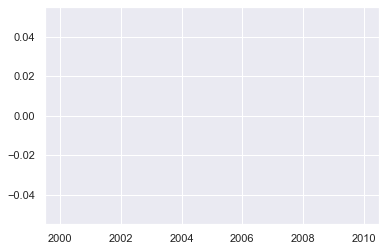

In [68]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)
